In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils_plot import load_dummy_model, plot_latent, plot_latent_nolabel
import torch
import pickle
import yaml

In [3]:
vae = load_dummy_model()
data0 = torch.rand(16, 256, 130, 1)
data1 = torch.rand(16, 256, 130, 1)

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 no

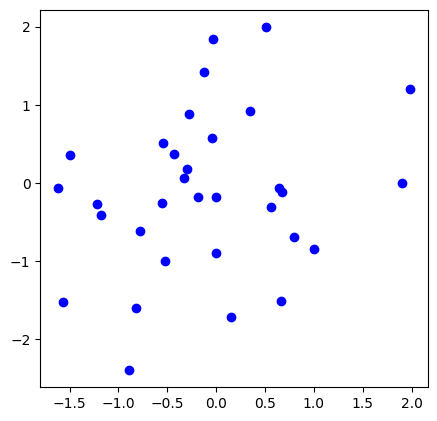

In [4]:
plot_latent_nolabel(vae, [data0, data1] )

# Open MIDI Files

In [5]:
from utils_plot import load_dummy_model, plot_latent, plot_latent_nolabel, generate_loader, get_metadata

In [72]:
import pretty_midi

In [6]:
with open('../data/batches/tensors-0.pkl', 'rb') as f:
    X, y = pickle.load(f)

In [79]:
metadata = get_metadata()

In [80]:
#!pip install pretty_midi==0.2.9

In [192]:
song = 0

In [193]:
metadata[y[song]]

{'artist': 'Lenny Kravitz', 'song': 'Again'}

In [194]:
#X.shape torch.Size([1024, 256, 130, 4])
drum = X[song:song+1, :, :, 0] #drums

In [195]:
drum.shape

torch.Size([1, 256, 130])

In [196]:
tempo = 120

program = 0
velocity = int(100)
bps = tempo / 60
sps = bps * 4 # sixteenth notes per second

# Create a PrettyMIDI object
piano_midi = pretty_midi.PrettyMIDI()

In [197]:
piano = pretty_midi.Instrument(program=program)

In [198]:
piano

Instrument(program=0, is_drum=False, name="")

In [199]:
import config_preprocessing as config_pre
from dataset import MidiDataset

In [200]:
dataset = MidiDataset(**config_pre.midi_params, **config_pre.general_params, **config_pre.preprocessing_params)

In [201]:
foo = dataset.postprocess(drum, drum, drum, drum)

In [202]:
foo.shape

(1, 256, 128, 4)

In [203]:
drum = foo[:,:,:,0]

In [204]:
pm = pretty_midi.PrettyMIDI(initial_tempo=80)

In [205]:
print(pm.instruments)

[]


In [206]:
# Let's add a Cello instrument, which has program number 42.
# pretty_midi also keeps track of whether each instrument is a "drum" instrument or not
# because drum/non-drum instruments share program numbers in MIDI.
# You can also optionally give the instrument a name,
# which corresponds to the MIDI "instrument name" meta-event.
pm.instruments =[]
inst = pretty_midi.Instrument(program=114, is_drum=True, name='my cello')
pm.instruments.append(inst)

In [207]:
pm.instruments

[Instrument(program=114, is_drum=True, name="my cello")]

In [208]:
from matplotlib import pyplot as plt
import librosa.display
import IPython.display
import numpy as np
#Supress default INFO logging

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [209]:
#drum.shape
#for t in drum[]
phrase_len = 60
starts = np.linspace(0, phrase_len, drum.shape[1])
ends = starts + phrase_len / 255
pitches = drum.argmax(axis=2)[0]
mask = pitches!=0
velocity = int(100)

inst.notes = []
for pitch, start, end in zip(pitches[mask], starts[mask], ends[mask]):
    inst.notes.append(pretty_midi.Note(velocity, pitch, start, end))

In [210]:
max(ends)

60.23529411764706

In [211]:
# Synthesis frequency
fs = 16000
# IPython.display.Audio(pm.synthesize(fs), rate=fs)
IPython.display.Audio(pm.fluidsynth(fs), rate=fs)
# Sounds like sine waves...

In [140]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

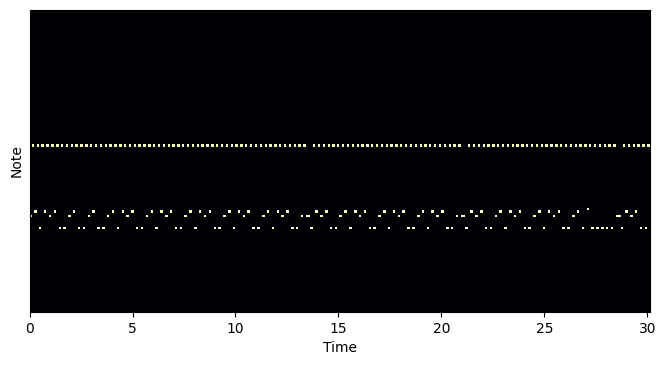

In [141]:
plt.figure(figsize=(8, 4))
plot_piano_roll(pm, 0, 128)

In [106]:
import fluidsynth

In [212]:
print(y[2], metadata[y[0]])


7902_36 {'artist': 'Lenny Kravitz', 'song': 'Again'}


In [ ]:
plot_piano_roll(pm, )